#Notebook train and inference

##initialisation

###check RAM memory and GPU type (google colab)

In [2]:
from psutil import virtual_memory
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

/bin/bash: line 1: nvidia-smi: command not found
Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


###install onnx for inference


In [3]:
!pip install onnx
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00


###choose device

In [4]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### mount to your google cloud
the code will work without be checkpoints will not be save after the runtime deleted

In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


###copy in drive folder that will contain save checkpoints

In [6]:
import os
import gdown


# Define folder IDs (from the shared links)
folder_ids = {
    "isnet_classic_save": "12YNqjjk2eoXs1pDGgC7x7BX8x1PbZVJU",
    "isnet_depth_save": "1gqpKalCZgtU-5F9W7p45bANFTRGDOqyr"
}

# Define destination in Google Drive
destination_drive_base = "/content/drive/MyDrive"

# Loop through each folder
for folder_name, folder_id in folder_ids.items():
    folder_path = os.path.join(destination_drive_base, folder_name)

    # Check if folder already exists
    if os.path.exists(folder_path):
        print(f"Skipping {folder_name} - already exists in Google Drive.")
    else:
        print(f"Copying {folder_name} to Google Drive...")
        gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", output=folder_path, quiet=False)
        print(f"{folder_name} copied successfully!")

print("Process completed!")

Copying isnet_classic_save to Google Drive...


Retrieving folder contents


Processing file 1PUnl6E7y5Uy3jWDbodo5aVXLlQkJlW9u isnet_depth.pth


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1PUnl6E7y5Uy3jWDbodo5aVXLlQkJlW9u
From (redirected): https://drive.google.com/uc?id=1PUnl6E7y5Uy3jWDbodo5aVXLlQkJlW9u&confirm=t&uuid=5ef071e6-61f8-4de0-94cc-b08be2c8679e
To: /content/drive/MyDrive/isnet_classic_save/isnet_depth.pth
100%|██████████| 177M/177M [00:02<00:00, 60.6MB/s]
Download completed
Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed


isnet_classic_save copied successfully!
Copying isnet_depth_save to Google Drive...
Processing file 1v8NUbD-rEIEY5JANiuCaPtJUuYbZjK4S isnet_classic.pth


Downloading...
From (original): https://drive.google.com/uc?id=1v8NUbD-rEIEY5JANiuCaPtJUuYbZjK4S
From (redirected): https://drive.google.com/uc?id=1v8NUbD-rEIEY5JANiuCaPtJUuYbZjK4S&confirm=t&uuid=d08d5cc4-4345-49a5-b9a1-08d08fc16b3e
To: /content/drive/MyDrive/isnet_depth_save/isnet_classic.pth
100%|██████████| 177M/177M [00:03<00:00, 50.7MB/s]

isnet_depth_save copied successfully!
Process completed!



Download completed


###clone the ISNET model repository

In [7]:
!git clone https://github.com/xuebinqin/DIS.git

Cloning into 'DIS'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 361 (delta 159), reused 132 (delta 132), pack-reused 177 (from 1)
Receiving objects: 100% (361/361), 49.60 MiB | 44.51 MiB/s, done.
Resolving deltas: 100% (176/176), done.


###clone the ISNET depth change file

In [8]:
!git clone https://github.com/pierrre1618/depth-isnet.git

Cloning into 'depth-isnet'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 2.44 MiB | 6.65 MiB/s, done.
Resolving deltas: 100% (8/8), done.


###change the current directory to be inside the DIS project

In [9]:
%cd DIS/IS-Net/

/content/DIS/IS-Net


###download training data (training only)

In [15]:
import zipfile

# Google Drive file ID (extracted from the public link)
file_id = "1JWCZT4LNdmYUS3fSkxCO50bkxnbswDA-"
destination_path = "DIS5K.zip"  # Save the file as 'DIS5K.zip'

# Download the file from Google Drive
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", destination_path, quiet=False)

# Unzip the file
with zipfile.ZipFile(destination_path, 'r') as zip_ref:
    zip_ref.extractall('..')  # Extract in the current directory

print("File downloaded and unzipped successfully!")


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1JWCZT4LNdmYUS3fSkxCO50bkxnbswDA-
From (redirected): https://drive.google.com/uc?export=download&id=1JWCZT4LNdmYUS3fSkxCO50bkxnbswDA-&confirm=t&uuid=600486e7-6f9c-4a8e-8db5-717b1d00d8a1
To: /content/DIS/IS-Net/DIS5K.zip
100%|██████████| 1.10G/1.10G [00:13<00:00, 82.9MB/s]


File downloaded and unzipped successfully!


###copy the new files inside the isnet project

In [11]:
import shutil
import os

# Define the source directory (two levels up from the current working directory)
source_dir = os.path.abspath(os.path.join(os.getcwd(), "../../depth-isnet"))

# Define the specific files to copy
source_files = [
    os.path.join(source_dir, "train_valid_inference_main_depth.py"),
    os.path.join(source_dir, "train_valid_inference_main.py"),
    os.path.join(source_dir, "data_loader_cache_depth.py"),
    os.path.join(source_dir, "data_loader_cache.py")
]

destination_dir = os.getcwd()  # Copy to the current directory

# Copy the files
for file_path in source_files:
    if os.path.exists(file_path):
        shutil.copy(file_path, destination_dir)
        print(f"Copied: {file_path}")
    else:
        print(f"Skipping (not found): {file_path}")

print("File copy process completed!")


Copied: /content/depth-isnet/train_valid_inference_main_depth.py
Copied: /content/depth-isnet/train_valid_inference_main.py
Copied: /content/depth-isnet/data_loader_cache_depth.py
Copied: /content/depth-isnet/data_loader_cache.py
File copy process completed!


###clear cache if needed (training only)

In [12]:
!rm -r ../DIS5K-Cache/

rm: cannot remove '../DIS5K-Cache/': No such file or directory


##training models (training only)

###function to initialise parameters, data and path (training only)

In [13]:
import os
import train_valid_inference_main_depth
import train_valid_inference_main
from transformers import pipeline
import torch
import shutil
import zipfile
from models import *

def configure_datasets_and_hypar(restore_model_filename, save_model_path, ch_in, mode="train"):
    """
    Configures the training/validation datasets and hyperparameters.

    Args:
        restore_model_filename (str): Relative filename (or path) of the pretrained model weights
                                      relative to save_model_path. Use "" if not.
        save_model_path (str): Directory path where model weights will be saved.
        ch_in (int): Number of input channels for the model.
        mode (str): "train" for training mode or "valid" for validation/inference mode.

    Returns:
        tuple: A tuple containing (hypar, train_datasets, valid_datasets)
    """
    ### --------------- STEP 1: Configuring the Train, Valid and Test datasets ---------------
    # Define training dataset
    dataset_tr = {
        "name": "DIS5K-TR",
        "im_dir": "../DIS5K/DIS-TR/im",
        "gt_dir": "../DIS5K/DIS-TR/gt",
        "im_ext": ".jpg",
        "gt_ext": ".png",
        "cache_dir": "../DIS5K-Cache/DIS-TR"
    }

    # Define validation dataset
    dataset_vd = {
        "name": "DIS5K-VD",
        "im_dir": "../DIS5K/DIS-VD/im",
        "gt_dir": "../DIS5K/DIS-VD/gt",
        "im_ext": ".jpg",
        "gt_ext": ".png",
        "cache_dir": "../DIS5K-Cache/DIS-VD"
    }

    # (Optional) Additional test datasets can be defined here if needed.
    dataset_te1 = {
        "name": "DIS5K-TE1",
        "im_dir": "../DIS5K/DIS-TE1/im",
        "gt_dir": "../DIS5K/DIS-TE1/gt",
        "im_ext": ".jpg",
        "gt_ext": ".png",
        "cache_dir": "../DIS5K-Cache/DIS-TE1"
    }
    dataset_te2 = {
        "name": "DIS5K-TE2",
        "im_dir": "../DIS5K/DIS-TE2/im",
        "gt_dir": "../DIS5K/DIS-TE2/gt",
        "im_ext": ".jpg",
        "gt_ext": ".png",
        "cache_dir": "../DIS5K-Cache/DIS-TE2"
    }
    dataset_te3 = {
        "name": "DIS5K-TE3",
        "im_dir": "../DIS5K/DIS-TE3/im",
        "gt_dir": "../DIS5K/DIS-TE3/gt",
        "im_ext": ".jpg",
        "gt_ext": ".png",
        "cache_dir": "../DIS5K-Cache/DIS-TE3"
    }
    dataset_te4 = {
        "name": "DIS5K-TE4",
        "im_dir": "../DIS5K/DIS-TE4/im",
        "gt_dir": "../DIS5K/DIS-TE4/gt",
        "im_ext": ".jpg",
        "gt_ext": ".png",
        "cache_dir": "../DIS5K-Cache/DIS-TE4"
    }

    # Assemble the dataset lists.
    train_datasets = [dataset_tr]  # You can add more training datasets here.
    valid_datasets = [dataset_vd]  # You can also include test sets if needed.

    ### --------------- STEP 2: Configuring the hyperparameters ---------------
    hypar = {}

    # Set operation mode.
    hypar["mode"] = mode  # "train" for training, "valid" for validation/inference.
    hypar["interm_sup"] = False  # Intermediate feature supervision flag.

    # Set model saving and restoring paths.
    hypar["model_path"] = save_model_path
    if restore_model_filename:
        # Compute the restore path relative to the save path.
        hypar["restore_model"] = restore_model_filename
    else:
        hypar["restore_model"] = ""

    # Setup based on mode.
    if mode == "train":
        hypar["valid_out_dir"] = ""  # In training mode, leave the validation output directory empty.
        # Optionally, extract the starting iteration from the filename if required.
        hypar["start_ite"] = 70000  # Update as needed if resuming training.
    else:
        hypar["valid_out_dir"] = "../your-results/"  # Output directory for inference results.

    hypar["gt_encoder_model"] = ""

    ## --- 2.2. Choose floating point precision ---
    hypar["model_digit"] = "full"  # Options: "half" or "full"
    hypar["seed"] = 0

    ## --- 2.3. Cache data spatial size ---
    hypar["cache_size"] = [1024, 1024]  # Cached input spatial resolution.
    hypar["cache_boost_train"] = False  # Set to True to load all training data into RAM.
    hypar["cache_boost_valid"] = False  # Set to True to load all validation data into RAM.

    ## --- 2.4. Data augmentation parameters ---
    hypar["input_size"] = [1024, 1024]  # Model input spatial size.
    hypar["crop_size"] = [900, 900]      # Random crop size for data augmentation.
    hypar["random_flip_h"] = 1  # Horizontal flip.
    hypar["random_flip_v"] = 1 # Vertical flip.

    ## --- 2.5. Define model  ---
    print("Building model with", ch_in, "input channels...")
    # Ensure that ISNetDIS is imported or defined in your project.
    hypar["model"] = ISNetDIS(in_ch=ch_in)
    hypar["early_stop"] = 20      # Early stopping patience.
    hypar["model_save_fre"] = 2000  # Frequency (in iterations) to save the model.

    hypar["batch_size_train"] = 6  # Batch size for training.
    hypar["batch_size_valid"] = 1  # Batch size for validation/inference.
    print("Batch size (train):", hypar["batch_size_train"])

    hypar["max_ite"] = 100000000    # Maximum number of iterations.
    hypar["max_epoch_num"] = 10000000  # Maximum number of epochs.

    return hypar, train_datasets, valid_datasets



/usr/local/lib/python3.11/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


###train isnet_depth model

In [14]:
#path to save checkpoint
save_path = "/content/drive/MyDrive/isnet_depth_data"
# Specify the filename (relative to save_path) for the pretrained model if no pretrained then ""
restore_filename = "isnet_depth.pth"
#4 channels (RGB+depth)
input_channels = 4
# Get the configured hyperparameters and datasets.
hypar, train_datasets, valid_datasets = configure_datasets_and_hypar(restore_filename, save_path, input_channels, mode="train")


pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-small-hf",device=device)

# Now call your main training/inference function.
train_valid_inference_main_depth.main(device,pipe,train_datasets, valid_datasets,hypar)


Building model with 4 input channels...
Batch size (train): 6


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


--- create training dataloader ---
------------------------------ train --------------------------------
--->>> train  dataset  0 / 1   DIS5K-TR <<<---
-im- DIS5K-TR ../DIS5K/DIS-TR/im :  0
-gt- DIS5K-TR ../DIS5K/DIS-TR/gt :  0
-depth- DIS5K-TR :  No Depth Found


0it [00:00, ?it/s]


ValueError: num_samples should be a positive integer value, but got num_samples=0

###train classic isnet

In [ ]:
#path to save checkpoint
save_path = "/content/drive/MyDrive/isnet_classic_data"
# Specify the filename (relative to save_path) for the pretrained model if no pretrained then ""
restore_filename = "isnet_classic.pth"
#4 channels (RGB+depth)
input_channels = 3
# Get the configured hyperparameters and datasets.
hypar, train_datasets, valid_datasets = configure_datasets_and_hypar(restore_filename, save_path, input_channels, mode="train")

# Now call your main training/inference function.
train_valid_inference_main.main(device,train_datasets, valid_datasets, hypar=hypar)


#inference and export models

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoModelForDepthEstimation
from models import ISNetDIS  # Your custom ISNet model

# =============================================================================
# Fused Model Definition: combines Depth-Anything and ISNet.
# =============================================================================
class FusedModel(nn.Module):
    def __init__(self, depth_model, isnet_model):
        """
        depth_model: a torch.nn.Module that takes (B,3,H,W) and outputs a depth map (B,1,H_d,W_d)
        isnet_model: a torch.nn.Module that expects a 4-channel input (B,4,H,W)
        """
        super(FusedModel, self).__init__()
        self.depth_model = depth_model
        self.isnet_model = isnet_model

    def forward(self, x):
        """
        x: Input RGB image tensor of shape (B, 3, H, W)
        Returns: Segmentation mask tensor (B,1,H,W)
        """
        # 1. Compute depth. (Assumes depth_model outputs a tuple/list where the first element is the depth)
        depth_out = self.depth_model(x)[0].unsqueeze(0)

        # 2. Resize depth to match the input size if necessary.
        if depth_out.shape[2:] != x.shape[2:]:
            depth_out = F.interpolate(depth_out, size=x.shape[2:], mode='bilinear', align_corners=False)

        # 3. Normalize the depth per sample.
        d_min = torch.amin(depth_out, dim=[2, 3], keepdim=True)
        d_max = torch.amax(depth_out, dim=[2, 3], keepdim=True)
        depth_norm = (depth_out - d_min) / (d_max - d_min + 1e-8)  # (B,1,H,W)

        # 4. Fuse RGB and normalized depth into a 4-channel tensor.
        fused_input = torch.cat([x, depth_norm], dim=1)  # (B,4,H,W)

        # 4.1 Normalize the 4-channel input with mean=[0.5, 0.5, 0.5, 0.5] and std=[1.0, 1.0, 1.0, 1.0]
        mean = torch.tensor([0.5, 0.5, 0.5, 0.5], device=fused_input.device).view(1, 4, 1, 1)
        std = torch.tensor([1.0, 1.0, 1.0, 1.0], device=fused_input.device).view(1, 4, 1, 1)
        fused_input = (fused_input - mean) / std

        # 5. Pass fused input through ISNet.
        seg_outputs = self.isnet_model(fused_input)

        # Assume the segmentation result is the first element in the list.
        ds_val = seg_outputs[0][0]  # (B, 1, H_seg, W_seg)
        if ds_val.shape[2:] != x.shape[2:]:
            seg_mask = F.interpolate(ds_val, size=x.shape[2:], mode='bilinear', align_corners=False)
        else:
            seg_mask = ds_val

        # Apply sigmoid to obtain mask values in [0,1]
        seg_mask = torch.sigmoid(seg_mask)
        return seg_mask

# =============================================================================
# Function to export the fused model to ONNX.
# =============================================================================
def export_fused_model(onnx_filename="fused_model.onnx"):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    device="cpu"
    target_size = (1024, 1024)  # fixed input resolution

    # ---------------------------
    # Load Depth Model from Hugging Face.
    # ---------------------------
    print("Loading depth model...")
    depth_model = AutoModelForDepthEstimation.from_pretrained("depth-anything/Depth-Anything-V2-large-hf")
    depth_model.to(device)
    depth_model.eval()

    # ---------------------------
    # Load the ISNet Model.
    # ---------------------------
    print("Loading ISNet model...")
    hypar = {}
    hypar["model_path"] = "/content/drive/MyDrive/isnet_depth_data"  # adjust path as needed
    hypar["restore_model"] = "isnet_depth.pth"
    #hypar["restore_model"] = "/content/drive/MyDrive/data_train/results_depth/gpu_itr_30500_traLoss_0.3603_traTarLoss_0.0372_valLoss_1.1503_valTarLoss_0.1655_maxF1_0.8762_mae_0.0493_time_0.02835.pth"
    hypar["model_digit"] = "full"  # "full" or "half"

    # Initialize ISNetDIS with 4 channels (RGB + Depth)
    isnet_model = ISNetDIS(in_ch=4)
    model_file = os.path.join(hypar["model_path"], hypar["restore_model"])
    state_dict = torch.load(model_file, map_location=device)
    isnet_model.load_state_dict(state_dict)
    isnet_model.to(device)
    isnet_model.eval()

    # ---------------------------
    # Create and Export the Fused Model.
    # ---------------------------
    print("Creating fused model...")
    fused_model = FusedModel(depth_model, isnet_model)
    fused_model.to(device)
    fused_model.eval()

    # Create a dummy input tensor of shape (1,3,1024,1024).
    dummy_input = torch.randn(1, 3, target_size[0], target_size[1], device=device)

    print("Exporting fused model to ONNX...")
    torch.onnx.export(
        fused_model,
        dummy_input,
        onnx_filename,
        input_names=["input_image"],
        output_names=["segmentation_mask"],
        dynamic_axes={
            "input_image": {0: "batch_size"},
            "segmentation_mask": {0: "batch_size"}
        },
        opset_version=14,
        do_constant_folding=True
    )
    print(f"Fused model successfully exported to {onnx_filename}")



# =============================================================================
# Simple ISNet Model Definition: works directly on 3-channel RGB input.
# =============================================================================
class SimpleISNetModel(nn.Module):
    def __init__(self, isnet_model):
        """
        isnet_model: a torch.nn.Module that takes (B,3,H,W) and outputs a segmentation mask.
        """
        super(SimpleISNetModel, self).__init__()
        self.isnet_model = isnet_model

        # Register normalization parameters as buffers.
        self.register_buffer("mean", torch.tensor([0.5, 0.5, 0.5]).view(1, 3, 1, 1))
        self.register_buffer("std", torch.tensor([1.0, 1.0, 1.0]).view(1, 3, 1, 1))

    def forward(self, x):
        """
        x: Input RGB image tensor of shape (B, 3, H, W)
        Returns: Segmentation mask tensor of shape (B, 1, H, W) with values in [0, 1]
        """
        # Normalize the RGB input.
        x_norm = (x - self.mean) / self.std

        # Forward pass through ISNet.
        # Assumes that the ISNet model returns a list where the first element is the segmentation output.
        seg_outputs = self.isnet_model(x_norm)
        seg_mask = seg_outputs[0][0]  # Expected shape: (B, 1, H_seg, W_seg)

        # If the segmentation mask is not the same spatial size as the input, interpolate it.
        if seg_mask.shape[2:] != x.shape[2:]:
            seg_mask = F.interpolate(seg_mask, size=x.shape[2:], mode='bilinear', align_corners=False)

        # Apply sigmoid to bring values to the range [0, 1].
        seg_mask = torch.sigmoid(seg_mask)
        return seg_mask

# =============================================================================
# Function to export the simple ISNet model to ONNX.
# =============================================================================
def export_simple_model(onnx_filename="simple_isnet.onnx"):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    device = "cpu"  # Force CPU if desired; remove this line to use GPU when available.
    target_size = (1024, 1024)  # fixed input resolution

    # ---------------------------
    # Load the ISNet Model.
    # ---------------------------
    print("Loading ISNet model...")
    hypar = {}
    hypar["model_path"] = "/content/drive/MyDrive/isnet_classic_data"  # adjust path as needed
    hypar["restore_model"] = "isnet_classic.pth"
    hypar["model_digit"] = "full"  # "full" or "half"

    # Initialize ISNetDIS with 3 channels (RGB only)
    isnet_model = ISNetDIS(in_ch=3)
    model_file = os.path.join(hypar["model_path"], hypar["restore_model"])
    state_dict = torch.load(model_file, map_location=device)
    isnet_model.load_state_dict(state_dict)
    isnet_model.to(device)
    isnet_model.eval()

    # ---------------------------
    # Create and Export the Simple ISNet Model.
    # ---------------------------
    print("Creating simple ISNet model...")
    simple_model = SimpleISNetModel(isnet_model)
    simple_model.to(device)
    simple_model.eval()

    # Create a dummy input tensor of shape (1, 3, 1024, 1024).
    dummy_input = torch.randn(1, 3, target_size[0], target_size[1], device=device)

    print("Exporting simple ISNet model to ONNX...")
    torch.onnx.export(
        simple_model,
        dummy_input,
        onnx_filename,
        input_names=["input_image"],
        output_names=["segmentation_mask"],
        dynamic_axes={
            "input_image": {0: "batch_size"},
            "segmentation_mask": {0: "batch_size"}
        },
        opset_version=14,
        do_constant_folding=True
    )
    print(f"Simple ISNet model successfully exported to {onnx_filename}")



# =============================================================================
# Test the ONNX model and display the result with matplotlib.
# =============================================================================
def test_onnx_model(onnx_filename="fused_model.onnx", image_source="/home/pierre/Downloads/783113950101-159-P.jpg"):
    import onnxruntime as ort
    import numpy as np
    import torchvision.transforms as transforms
    import matplotlib.pyplot as plt
    from PIL import Image
    from io import BytesIO
    import requests

    # Check if image_source is a local file path.
    if os.path.exists(image_source):
        print("Loading local image...")
        image = Image.open(image_source).convert("RGB")
    else:
        print("Downloading image from URL...")
        response = requests.get(image_source)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    image = image.resize((1024, 1024))

    # Convert to tensor in [0,1] range.
    to_tensor = transforms.ToTensor()
    image_tensor = to_tensor(image)  # shape: (3,1024,1024)

    # Add batch dimension and convert to numpy (float32).
    input_np = image_tensor.unsqueeze(0).numpy().astype(np.float32)

    # Load the ONNX model.
    print("Loading ONNX model...")
    session = ort.InferenceSession(onnx_filename)
    input_name = session.get_inputs()[0].name

    # Run inference.
    print("Running inference...")
    outputs = session.run(None, {input_name: input_np})
    # Expected output shape: (1,1,1024,1024)
    segmentation_mask = outputs[0][0, 0, :, :]

    # Plot the input image and segmentation mask.
    print("Displaying results...")
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].imshow(image)
    ax[0].set_title("Input Image")
    ax[0].axis("off")

    ax[1].imshow(segmentation_mask, cmap="gray")
    ax[1].set_title("Segmentation Mask")
    ax[1].axis("off")
    plt.tight_layout()
    plt.show()


##export isnet_depth together with a depth model to onnx

In [ ]:
export_fused_model(onnx_filename="fused_model.onnx")

Loading depth model...


config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Loading ISNet model...


<ipython-input-21-32b3f75c6e3b>:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_file, map_location=device)


Creating fused model...
Exporting fused model to ONNX...


<ipython-input-21-32b3f75c6e3b>:30: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if depth_out.shape[2:] != x.shape[2:]:
<ipython-input-21-32b3f75c6e3b>:42: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mean = torch.tensor([0.5, 0.5, 0.5, 0.5], device=fused_input.device).view(1, 4, 1, 1)
<ipython-input-21-32b3f75c6e3b>:43: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be

Fused model successfully exported to fused_model.onnx


##export simple isnet to onnx

In [ ]:
export_simple_model(onnx_filename="simple_isnet.onnx")

Loading ISNet model...


<ipython-input-12-5d4a77426362>:180: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_file, map_location=device)


Creating simple ISNet model...
Exporting simple ISNet model to ONNX...


<ipython-input-12-5d4a77426362>:152: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if seg_mask.shape[2:] != x.shape[2:]:


Simple ISNet model successfully exported to simple_isnet.onnx


##inference isnet depth

Loading local image...
Loading ONNX model...
Running inference...
Displaying results...


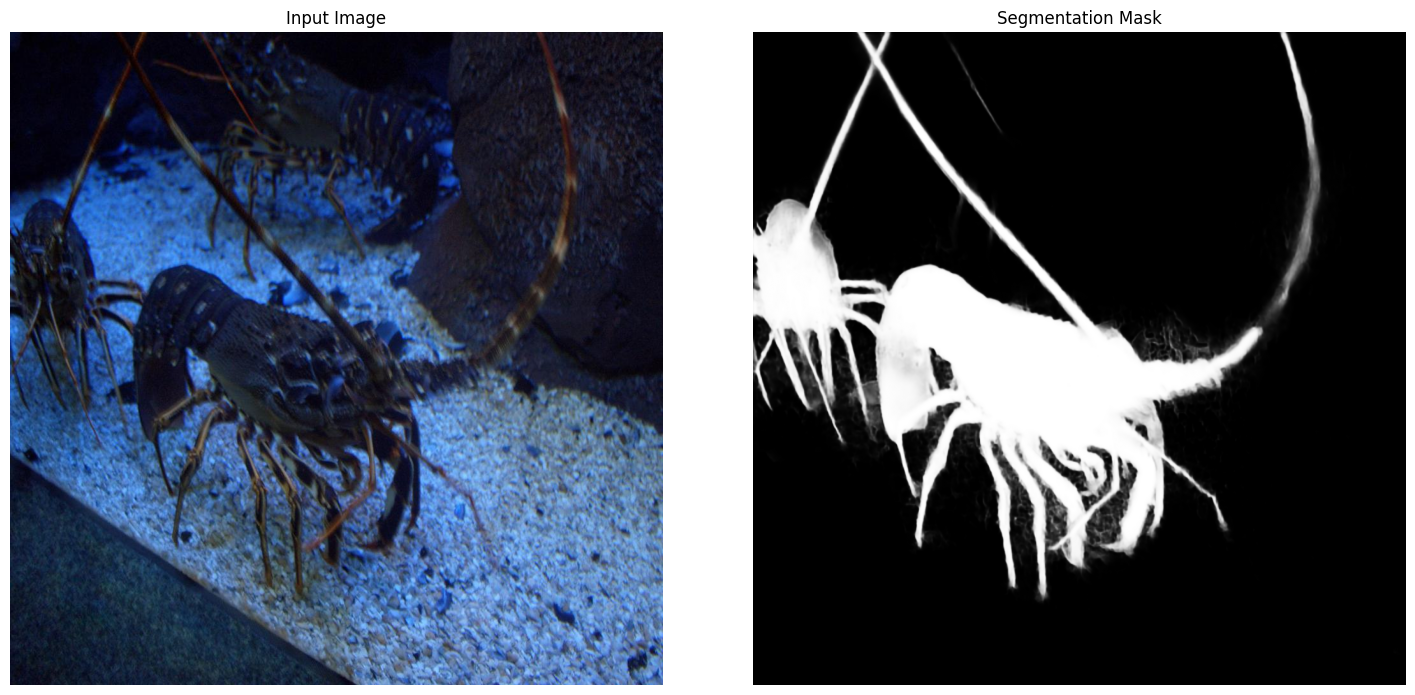

In [ ]:
image_path = "/content/DIS/DIS5K/DIS-TE2/im/3#Aquatic#1#Lobster#244421747_5345a28183_o.jpg"
test_onnx_model(onnx_filename="fused_model.onnx", image_source=image_path)


##inference simple isnet

Loading local image...
Loading ONNX model...
Running inference...
Displaying results...


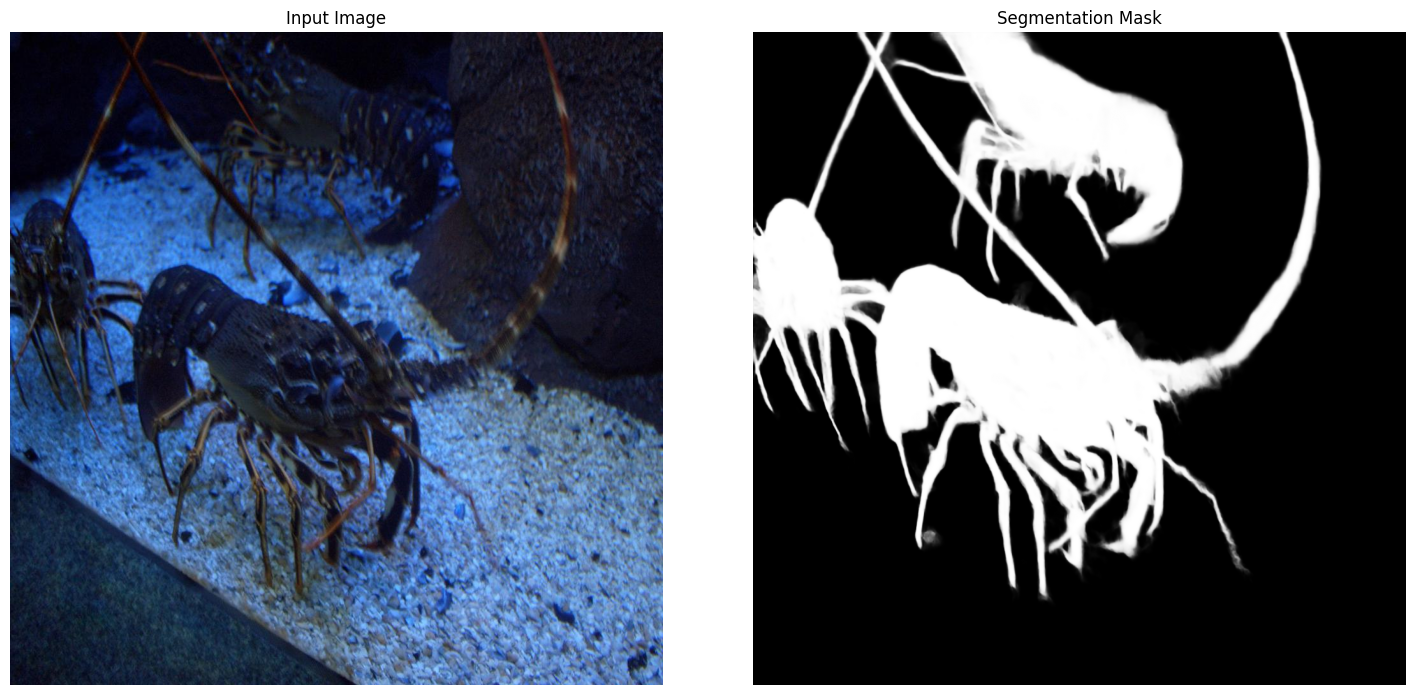

In [ ]:
image_path = "/content/DIS/DIS5K/DIS-TE2/im/3#Aquatic#1#Lobster#244421747_5345a28183_o.jpg"
test_onnx_model(onnx_filename="simple_isnet.onnx", image_source=image_path)
